<a href="https://colab.research.google.com/github/Jonas1997Pereira/Introdu-o-Ci-ncia-de-Dados/blob/main/05_data_split_and_cross_validation_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia Média na Validação Cruzada: 0.87 ± 0.00
Matriz de Confusão:
[[12986  1967]
 [ 1990 13057]]


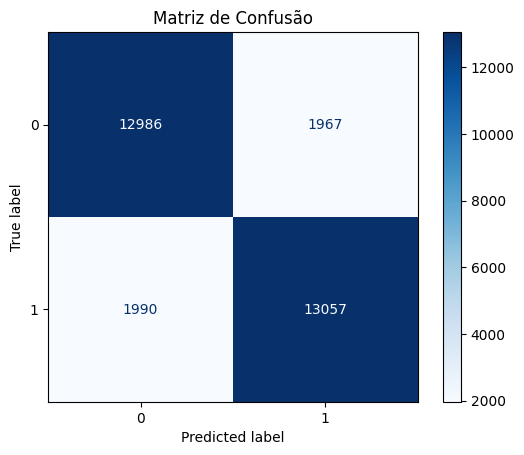


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14953
           1       0.87      0.87      0.87     15047

    accuracy                           0.87     30000
   macro avg       0.87      0.87      0.87     30000
weighted avg       0.87      0.87      0.87     30000



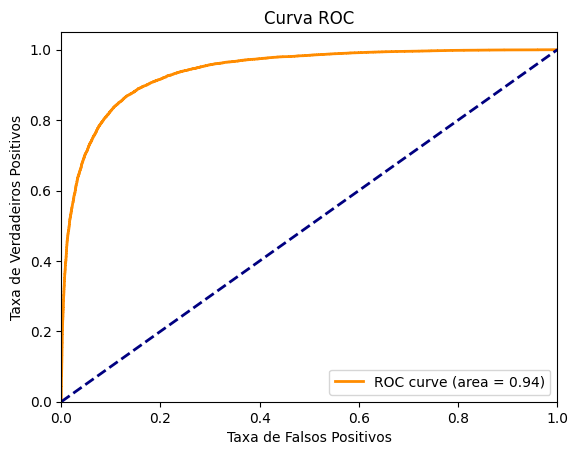

In [1]:
import numpy as np  # Importa a biblioteca NumPy para operações numéricas
import matplotlib.pyplot as plt  # Importa Matplotlib para criar gráficos
from sklearn.datasets import make_classification  # Importa a função para criar conjuntos de dados sintéticos para classificação
from sklearn.model_selection import train_test_split, cross_val_score, KFold  # Importa funções para dividir dados e validação cruzada
from sklearn.linear_model import LogisticRegression  # Importa o modelo de Regressão Logística
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay  # Importa métricas de avaliação e visualização
from sklearn.model_selection import cross_val_predict  # Importa a função para previsões com validação cruzada

X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42) # Criação do conjunto de dados sintéticos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Dividindo o conjunto de dados em treino e teste
model = LogisticRegression(max_iter=1000) # Criação do modelo de Regressão Logística

# Validação Cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Cria um objeto KFold para validação cruzada com 5 partições, embaralhando os dados
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')  # Avalia o modelo usando validação cruzada e calcula a acurácia para cada partição
print(f"Acurácia Média na Validação Cruzada: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")  # Exibe a acurácia média e o desvio padrão das acurácias obtidas na validação cruzada

model.fit(X_train, y_train) # Treinamento do modelo no conjunto de treino

# Previsões no conjunto de teste
y_pred = model.predict(X_test)  # Faz previsões das classes no conjunto de teste usando o modelo treinado
y_prob = model.predict_proba(X_test)[:, 1]  # Obtém as probabilidades previstas para a classe positiva (classe 1) no conjunto de teste

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)  # Calcula a matriz de confusão comparando as previsões com os valores reais
print("Matriz de Confusão:")  # Exibe um título para a matriz de confusão
print(conf_matrix)  # Imprime a matriz de confusão na tela

# Exibindo a Matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)  # Cria um objeto de exibição para a matriz de confusão
disp.plot(cmap=plt.cm.Blues)                                # Plota a matriz de confusão com um mapa de cores azul
plt.title('Matriz de Confusão')                             # Adiciona um título ao gráfico
plt.show()                                                  # Exibe o gráfico

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)   # Calcula as taxas de falso positivo (FPR) e verdadeiro positivo (TPR) para diferentes limiares
roc_auc = roc_auc_score(y_test, y_prob)   # Calcula a área sob a curva ROC (AUC-ROC)

plt.figure()                                                          # Cria uma nova figura para o gráfico
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Plota a curva ROC com a cor laranja e a área sob a curva
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')          # Plota a linha de referência diagonal (curva aleatória)
plt.xlim([0.0, 1.0])                                                  # Define os limites do eixo x de 0 a 1
plt.ylim([0.0, 1.05])                                                 # Define os limites do eixo y de 0 a 1.05
plt.xlabel('Taxa de Falsos Positivos')                                # Adiciona o rótulo 'Taxa de Falsos Positivos' ao eixo x
plt.ylabel('Taxa de Verdadeiros Positivos')                           # Adiciona o rótulo 'Taxa de Verdadeiros Positivos' ao eixo y
plt.title('Curva ROC')                                                # Define o título do gráfico como 'Curva ROC'
plt.legend(loc='lower right')                                         # Adiciona a legenda no canto inferior direito do gráfico
plt.show()                                                            # Exibe o gráfico

